In [14]:
import sys
sys.path.append('..')

from train_config.dataset import create_dataset
from train_config.train_config import TrainConfig

In [3]:
import os

os.environ['SUPERVISELY_DATASET'] = r'/home/toodef/datasets/supervisely_person'
os.environ['PICSART_DATASET'] = r'/mnt/ssd500/datasets/picsart'

In [19]:
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 5) # (w, h)

def viz_hist(analysing_dataset, title: str) -> []:
    labels = []
    for item in analysing_dataset:
        labels.append(int(10 * np.count_nonzero(item['target']) / item['target'].size))
            
    print('Label values', set(labels))
    positives_cnt = np.count_nonzero(np.array(labels))
    if positives_cnt < len(labels):
        print('Negative:', len(labels) - positives_cnt, 'positive:', positives_cnt, 'ratio:', positives_cnt / (len(labels) - positives_cnt))

    plt.hist(labels)
    plt.grid()
    plt.title(title)
#     plt.yscale('log')
    plt.show()

# Folds

Overall images num: 1396
Label values {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Negative: 238 positive: 1158 ratio: 4.8655462184873945


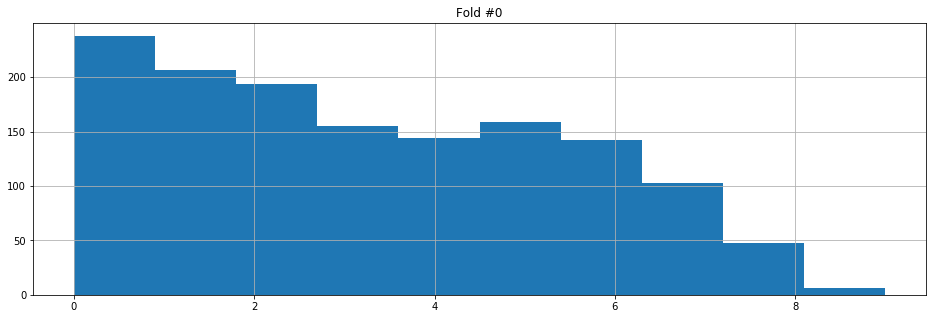

Overall images num: 1396
Label values {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Negative: 236 positive: 1160 ratio: 4.915254237288136


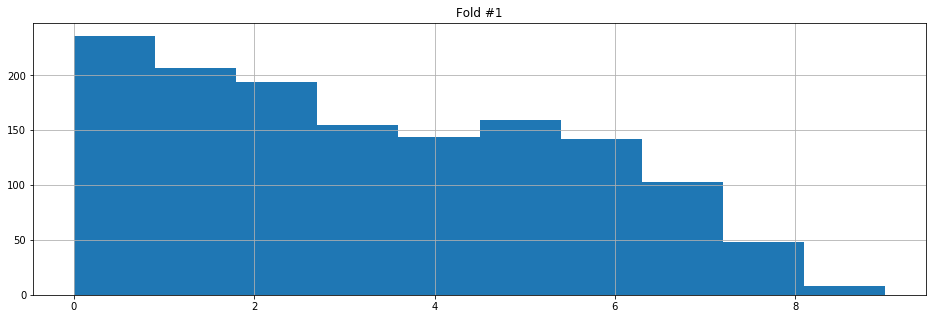

Overall images num: 1396
Label values {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Negative: 235 positive: 1161 ratio: 4.940425531914894


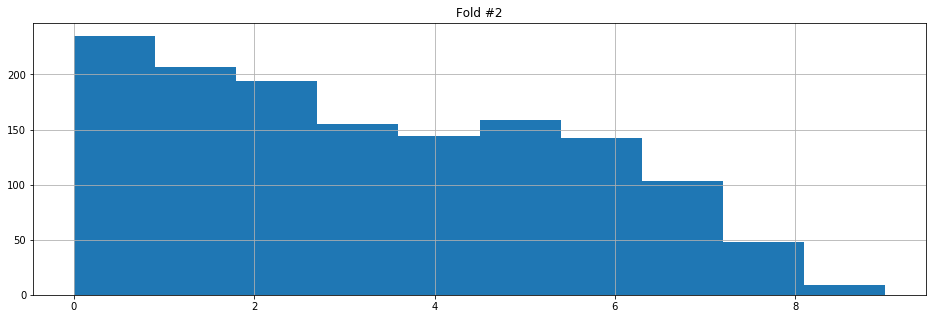

In [20]:
for fold in range(TrainConfig.folds_num):
    dataset = create_dataset(indices_path='../data/indices/fold_{}.npy'.format(fold))
    print("Overall images num: {}".format(len(dataset.get_items())))
    viz_hist(dataset, title="Fold #{}".format(fold))

# Test part

Overall images num: 463
Label values {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Negative: 76 positive: 387 ratio: 5.092105263157895


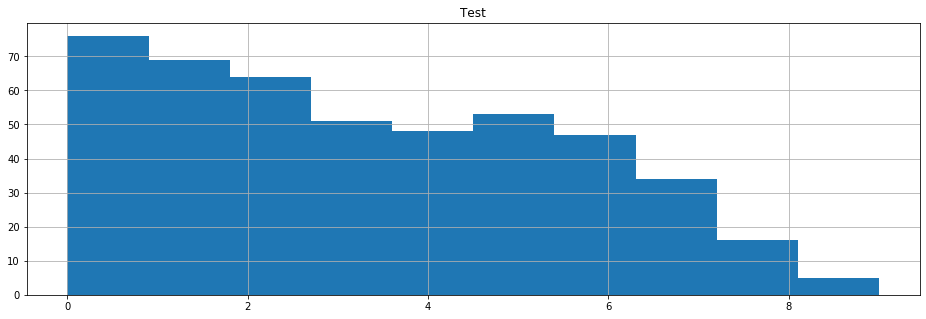

In [21]:
dataset = create_dataset(indices_path='../data/indices/test.npy')
print("Overall images num: {}".format(len(dataset.get_items())))
viz_hist(dataset, title="Test")

# Analyse data sizes

{640, 1152, 515, 517, 1286, 1288, 521, 1420, 908, 1422, 655, 1425, 1426, 531, 532, 533, 918, 534, 660, 530, 663, 1307, 800, 545, 1185, 547, 1187, 1190, 810, 1067, 1195, 1197, 1198, 1199, 1200, 1329, 1202, 1203, 1204, 1196, 1459, 1207, 1208, 1201, 571, 320, 1088, 1348, 1733, 1358, 1361, 1236, 600, 1241, 1120, 736, 1124, 1252, 742, 490, 1388, 1261, 1135, 240, 1264, 628, 1013, 1270, 1066, 1272, 1274, 1068}


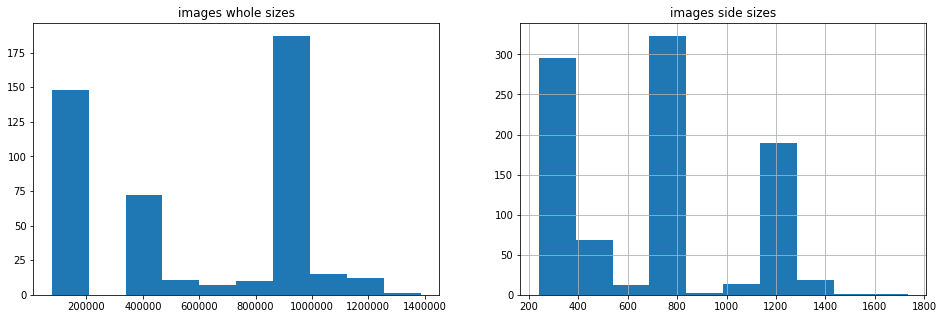

In [24]:
images_side_sizes = []
images_sizes = []

for it in dataset:
    images_side_sizes.append(it['data'].shape[0])
    images_side_sizes.append(it['data'].shape[1])
    images_sizes.append(it['data'].shape[0] * it['data'].shape[1])

print(set(images_side_sizes))
fig, axs = plt.subplots(1,2)
axs[0].hist(images_sizes)
axs[0].set_title('images whole sizes')
axs[1].hist(images_side_sizes)
axs[1].set_title('images side sizes')
plt.grid()
plt.show()